# Proyek Analisis Data: Air Quality Dataset (Daerah Dongsi)
- **Nama:** Ariajuna Yodyatara
- **Email:** ariajunay@student.ub.ac.id
- **ID Dicoding:** ariajunay

## Menentukan Pertanyaan Bisnis

- Bagaimana fokus kondisi polutan pada tiap tahunnya dalam hitungan perbulan? Apakah terjadi pola dalam naik turunnya polutan, atau terjadi peak(pemuncakan) pada bulan spesifik?
- Bagaimana polutan bereaksi bergantung pada curah hujan?
- Bagaimana kondisi polutan yang dihasilkan sesuai dengan suhu?




## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
data_df = pd.read_csv("/content/PRSA_Data_Dongsi_20130301-20170228.csv")
data_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi


### Assessing Data

**Menilai Data**

Pertama kita perlu mengecek tipe data pada dataframe

In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34314 non-null  float64
 6   PM10     34511 non-null  float64
 7   SO2      34401 non-null  float64
 8   NO2      33463 non-null  float64
 9   CO       31867 non-null  float64
 10  O3       34400 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


Lalu, kita perlu cek missing value, duplicate data, dan keanehan parameter pada data

**Checking Missing Value, Duplicate Data, and Anomalies**

In [ ]:
data_df.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       750
PM10        553
SO2         663
NO2        1601
CO         3197
O3          664
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

Kita mendapatkan beberapa missing value pada PM2.5 PM10, SO2, NO2, CO, O3, Temp, dan Rain dimana data untuk pada kolom tersebut dibutuhkan untuk mendapatkan kesimpulan, jadi hal ini masuk list untuk data cleaning nantinya.

In [ ]:
print("Duplicate Data:", data_df.duplicated().sum())

Duplicate Data: 0


Dan pada pengecekan data yang double atau duplicate, keluar 0 yang menandakan setiap data bersifat unik atau berbeda satu sama lain.

In [ ]:
data_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34314.000000,34511.000000,34401.000000,33463.000000,31867.000000,34400.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,86.194297,110.336742,18.531107,53.699443,1330.069131,57.210637,13.671490,1012.547419,2.447535,0.064020,1.860785
std,10122.249256,1.177213,3.448752,8.800218,6.922285,86.575127,98.219860,22.905655,33.959230,1191.305887,58.033275,11.458418,10.266059,13.810696,0.786282,1.280368
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.642600,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,4.000000,27.000000,600.000000,12.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,61.000000,86.000000,10.000000,47.000000,1000.000000,44.125200,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,119.000000,151.000000,24.000000,73.000000,1700.000000,81.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,737.000000,955.000000,300.000000,258.000000,10000.000000,1071.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


Tidak ada keanehan pada data, jadi kita bisa lanjut melakukan TODO yang sudah disiapkan seiring melakukan assessing data. (Walaupun max value rain adalah 46, hal tersebut menunjukkan seberapa derasnya hujan pada waktu tersebut. Bukan apakah hujan atau tidak)

### Cleaning Data

**Menghapus kolom yang tidak digunakan**

In [ ]:
drop_col = ['PRES', 'DEWP', 'wd', 'WSPM', 'station']

for i in data_df.columns:
  if i in drop_col:
    data_df.drop(labels=i, axis=1, inplace=True)

data_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,RAIN
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,0.0
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,0.0
2,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,0.0
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,0.0
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,0.0


Kita menghapus kolom yang tidak digunakan untuk mendapatkan kesimpulan sesuai pertanyaan yang sudah disusun.

**Mengubah detail tentang kolom**

In [ ]:
data_df['month'] = data_df['month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})

data_df['TEMP'] = data_df['TEMP'].map({
    -17: 'Frigid', -10: 'Very Cold', -6: 'Cold',
    4: 'Cool', 10: 'Mild', 15: 'Warm', 26: 'Hot', 32: 'Very Hot'
})

data_df['RAIN'] = data_df['RAIN'].map({
    30: 'Cloudburst', 18: 'Shower', 10: 'Very Heavy Rain',
    6: 'Heavy Rain', 2: 'Moderate Rain', 0.5: 'Weak Rain', 0: 'No Rain'
})

In [ ]:
data_df['month'] = data_df.month.astype('category')
# data_df['TEMP'] = data_df.TEMP.astype('category')
# data_df['RAIN'] = data_df.RAIN.astype('category')

data_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,RAIN
0,1,2013,Mar,1,0,9.0,9.0,3.0,17.0,300.0,89.0,NaN,No Rain
1,2,2013,Mar,1,1,4.0,4.0,3.0,16.0,300.0,88.0,NaN,No Rain
2,3,2013,Mar,1,2,7.0,7.0,NaN,17.0,300.0,60.0,NaN,No Rain
3,4,2013,Mar,1,3,3.0,3.0,5.0,18.0,NaN,NaN,NaN,No Rain
4,5,2013,Mar,1,4,3.0,3.0,7.0,NaN,200.0,84.0,NaN,No Rain


Mengubah bulan menjadi nama bulan, dan mengubah value rain sesuai intensitas nya.

**Menangani Missing Value**

In [ ]:
# Karena kita tidak mengerti value asli dari data NaN pada df, kita akan mengdrop setiap data yang berisi NaN
data_df.dropna()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,RAIN
12,13,2013,Mar,1,12,3.0,6.0,6.0,18.0,300.0,86.0,Cool,No Rain
57,58,2013,Mar,3,9,95.0,115.0,102.0,95.0,2399.0,3.0,Cool,No Rain
69,70,2013,Mar,3,21,152.0,202.0,45.0,122.0,2399.0,2.0,Cool,No Rain
94,95,2013,Mar,4,22,59.0,98.0,24.0,86.0,1100.0,32.0,Mild,No Rain
198,199,2013,Mar,9,6,104.0,112.0,69.0,125.0,3000.0,99.0,Cool,No Rain
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34424,34425,2017,Feb,2,8,38.0,52.0,10.0,58.0,900.0,68.0,Cold,No Rain
34524,34525,2017,Feb,6,12,3.0,5.0,2.0,12.0,300.0,78.0,Cool,No Rain
34788,34789,2017,Feb,17,12,8.0,8.0,2.0,10.0,100.0,86.0,Cool,No Rain
34988,34989,2017,Feb,25,20,18.0,37.0,5.0,32.0,400.0,70.0,Mild,No Rain


Dikarenakan kita tidak mengetahui value dari masing masing kolom yang bernilai Null, maka kita drop data tersebut.

## Exploratory Data Analysis (EDA)

### Explore data pada data_df

**1. Mengumpulkan data polutan berdasarkan tahun**

In [ ]:
data_df.groupby(by='year').agg({
    'PM2.5' : ['max', 'min', 'mean', 'sum'],
    'PM10' : ['max', 'min', 'mean', 'sum'],
    'SO2' : ['max', 'min', 'mean', 'sum']
})

PM2.5                              PM10                              \
        max  min        mean       sum    max  min        mean        sum   
year                                                                        
2013  520.0  3.0   86.940286  626057.0  602.0  2.0  104.961051   762647.0   
2014  737.0  3.0   87.469606  757749.2  794.0  3.0  117.000737  1015449.4   
2015  685.0  3.0   87.343090  754032.9  816.0  3.0  111.853397   971334.9   
2016  695.0  3.0   80.225952  676385.0  891.0  5.0  103.032885   874131.0   
2017  681.0  3.0  103.497114  143447.0  955.0  5.0  131.809013   184269.0   

        SO2                                  
        max     min       mean          sum  
year                                         
2013  198.0  0.2856  24.051632  172353.9984  
2014  230.0  2.0000  23.844470  206755.4000  
2015  145.0  2.0000  15.190444  131944.2000  
2016  278.0  2.0000  11.541863   97875.0000  
2017  300.0  1.0000  20.429185   28560.0000

In [ ]:
data_df.groupby(by='year').agg({
    'NO2' : ['max', 'min', 'mean', 'sum'],
    'CO' : ['max', 'min', 'mean', 'sum'],
    'O3' : ['max', 'min', 'mean', 'sum']
})

NO2                                    CO                      \
        max  min       mean          sum      max    min         mean   
year                                                                    
2013  258.0  2.0  57.656467  417259.8545   9400.0  100.0  1338.296558   
2014  236.0  2.0  55.847246  428851.0000   7700.0  100.0  1368.141388   
2015  256.0  4.0  50.342847  437076.6000  10000.0  100.0  1335.716753   
2016  210.0  2.0  51.103106  432690.0000   9900.0  100.0  1239.759036   
2017  192.0  2.0  57.987840   81067.0000   9500.0  100.0  1581.476122   

                      O3                                  
             sum     max     min       mean          sum  
year                                                      
2013   6259213.0  1071.0  0.6426  63.596872  459233.0094  
2014  11844000.0   320.0  1.0000  57.246473  494208.8000  
2015  11600700.0   308.0  2.0000  55.784312  484654.1000  
2016  10495800.0   342.0  2.0000  56.105742  474879.0000  
2017   2185600.0   500.0  1.0000  39.505739   55071.0000

Dapat disimpulkan bahwa polutan PM2.5 tertinggi ada pada tahun 2014, PM10 tertinggi pada tahun 2017, SO2 tertinggi pada tahun 2017, NO2 tertinggi pada tahun 2015, CO tertinggi pada tahun 2015, dan O3 tertinggi pada tahun 2013.

Jika dilihat pada rata rata data. tahun 2017 memilki rata rata tertinggi tiap polutan nya kecuali SO2 yang mana SO2 memiliki rata rata tertinggi pada tahun 2013.

**2. Mengumpulkan data polutan berdasarkan bulan**

In [ ]:
data_df.groupby(by='month').agg({
    'PM2.5' : ['max', 'min', 'mean', 'sum'],
    'PM10' : ['max', 'min', 'mean', 'sum'],
    'SO2' : ['max', 'min', 'mean', 'sum']
})

PM2.5                              PM10                             \
         max  min        mean       sum    max  min        mean       sum   
month                                                                       
Apr    460.0  3.0   77.080748  218601.0  663.0  3.0  121.588380  345311.0   
Aug    235.0  3.0   58.636977  171102.7  349.0  2.0   73.592532  214816.6   
Dec    680.0  3.0  113.132517  332609.6  737.0  2.0  139.025450  409151.9   
Feb    737.0  3.0   93.921598  249174.0  876.0  5.0  109.350299  292184.0   
Jan    681.0  3.0  100.505627  296491.6  955.0  5.0  118.521895  350232.2   
Jul    287.0  3.0   80.191354  226300.0  354.0  2.0   85.925289  244973.0   
Jun    515.0  3.0   73.305214  202469.0  551.0  2.0   87.477422  245636.6   
Mar    520.0  3.0  100.533640  295267.3  891.0  3.0  143.375247  421093.1   
May    408.0  3.0   70.027466  203709.9  848.0  5.0  108.409424  319807.8   
Nov    685.0  3.0   99.906711  285833.1  794.0  5.0  126.901675  363700.2   
Oct    450.0  3.0   98.773356  285455.0  508.0  3.0  123.101776  360442.0   
Sep    323.0  3.0   67.227750  190657.9  316.0  2.0   84.617488  240482.9   

            SO2                                 
            max     min       mean         sum  
month                                           
Apr    111.0000  2.0000  16.576877  47210.9464  
Aug     55.0000  0.2856   5.902134  17139.7968  
Dec    164.0000  2.0000  29.180233  85673.1632  
Feb    278.0000  2.0000  30.927115  81895.0000  
Jan    300.0000  1.0000  33.389234  98932.3000  
Jul    109.0992  0.2856   7.166912  19909.6808  
Jun     89.0000  0.2856  10.849726  30314.1336  
Mar    198.0000  2.0000  30.637164  89950.7128  
May    157.0000  2.0000  17.579022  51787.8000  
Nov    196.0000  2.0000  19.336785  55457.9000  
Oct    178.0000  1.0000  12.255018  36103.2840  
Sep    104.0000  1.0000   8.155921  23113.8808

In [ ]:
data_df.groupby(by='month').agg({
    'NO2' : ['max', 'min', 'mean', 'sum'],
    'CO' : ['max', 'min', 'mean', 'sum'],
    'O3' : ['max', 'min', 'mean', 'sum']
})

NO2                                    CO                      \
            max  min       mean          sum      max    min         mean   
month                                                                       
Apr    182.0000  2.0  47.216565  134142.2607   3800.0  100.0   914.354988   
Aug    140.0000  2.0  41.202140  120104.2385   6700.0  200.0   962.462349   
Dec    210.0000  2.0  67.016821  196560.3354  10000.0  100.0  2282.312651   
Feb    164.0000  2.0  45.625602   94810.0000   6600.0  100.0  1419.893698   
Jan    192.0000  2.0  60.306123  160534.9000   9500.0  100.0  1814.280868   
Jul    139.1934  4.0  41.265072  117481.6605   3600.0  200.0  1017.354597   
Jun    160.0000  6.0  45.409062  124330.0120  10000.0  100.0  1063.185487   
Mar    258.0000  6.0  61.793197  181363.0338   6800.0  100.0  1414.352003   
May    183.0000  2.0  45.110618  130008.8000   4700.0  100.0   929.248533   
Nov    198.0000  2.0  64.233182  183899.6000   9600.0  100.0  1803.814602   
Oct    256.0000  3.0  68.509330  201280.4121   6400.0  100.0  1279.794168   
Sep    166.0000  3.0  53.842883  152429.2015   4600.0  100.0  1088.168692   

                      O3                                  
             sum     max     min       mean          sum  
month                                                     
Apr    2575738.0   257.0  2.0000  72.113749  204947.2740  
Aug    2556300.0  1071.0  1.0000  92.439367  269553.1956  
Dec    5664700.0    76.0  2.0000  20.089314   58982.2270  
Feb    3740000.0   111.0  2.0000  41.775170  110370.0000  
Jan    5348500.0   500.0  1.0000  27.645350   81443.2000  
Jul    2169000.0   306.0  1.0710  91.208501  259488.1854  
Jun    2476159.0   335.0  2.0000  94.419614  263713.9818  
Mar    3989887.0   188.0  0.6426  51.681303  150857.7228  
May    2692033.0   306.0  2.0000  92.320788  270684.5492  
Nov    4397700.0   111.0  2.0000  18.743577   53644.1180  
Oct    3730600.0   247.0  1.0000  29.376334   86395.7974  
Sep    3044696.0   237.0  1.0000  55.897261  157965.6582

Dapat dilihat pada tabel diatas pada bulan Oktober - Maret (Akhir tahun dan Awal Tahun), intensitas polusi yang diukur memiliki value yang cukup tinggi.

Jika dilihat rata rata, kebanyakan polutas memiliki intensitas tinggi pada bulan Desember - Januari. namun beberapa polutan memiliki rata rata tinggi pada pertengahan tahun. Seperti; O3, dan PM10.

**3. Mengumpulkan Data Polutan Berdasarkan Curah Hujan**

In [ ]:
data_df.groupby(by='RAIN').agg({
    'PM2.5' : ['max', 'min', 'mean', 'sum'],
    'PM10' : ['max', 'min', 'mean', 'sum'],
    'SO2' : ['max', 'min', 'mean', 'sum']
})

PM2.5                                 PM10                     \
                 max    min        mean        sum    max    min        mean   
RAIN                                                                           
Heavy Rain     167.0  167.0  167.000000      167.0  266.0  266.0  266.000000   
Moderate Rain  203.0    3.0   55.538462      722.0  203.0    6.0   58.538462   
No Rain        737.0    3.0   86.974778  2868341.2  955.0    2.0  111.854786   
Weak Rain      253.0    5.0   72.743243     5383.0  388.0    5.0   77.905405   

                              SO2                                  
                     sum      max     min       mean          sum  
RAIN                                                               
Heavy Rain         266.0    2.856  2.8560   2.856000       2.8560  
Moderate Rain      761.0   17.000  2.0000   4.823938      62.7112  
No Rain        3709328.4  300.000  0.2856  18.992065  627763.7048  
Weak Rain         5765.0   52.000  1.9992  10.363901     756.5648

In [ ]:
data_df.groupby(by='RAIN').agg({
    'NO2' : ['max', 'min', 'mean', 'sum'],
    'CO' : ['max', 'min', 'mean', 'sum'],
    'O3' : ['max', 'min', 'mean', 'sum']
})

NO2                                         CO         \
                    max      min       mean           sum      max    min   
RAIN                                                                        
Heavy Rain      18.2717  18.2717  18.271700  1.827170e+01      NaN    NaN   
Moderate Rain   67.0000  16.0000  38.584362  5.015967e+02   3300.0  600.0   
No Rain        258.0000   2.0000  54.172717  1.740624e+06  10000.0  100.0   
Weak Rain      117.0000   8.0000  47.624667  3.286102e+03   4000.0  100.0   

                                            O3                        \
                      mean         sum     max       min        mean   
RAIN                                                                   
Heavy Rain             NaN         0.0   143.0  143.0000  143.000000   
Moderate Rain  1236.363636     13600.0   123.0    2.0000   55.850323   
No Rain        1334.087736  40903130.0  1071.0    0.6426   57.359091   
Weak Rain      1314.925373     88100.0  1071.0    2.0000   51.328767   

                             
                        sum  
RAIN                         
Heavy Rain     1.430000e+02  
Moderate Rain  7.260542e+02  
No Rain        1.895546e+06  
Weak Rain      3.747000e+03

Dapat dilihat pada tabel, disaat terjadi hujan deras atau Heavy Rain, polutan CO tidak keluar. dan pada saat tidak terjadi hujan atau No Rain disitu dimana polutan bisa mencapai value yang tinggi.

Jika dilihat rata rata dan sum pada data, kebanyaan data jarang keluar pada Heavy rain. Jadi, kita dapat kesimpulan jarang sekali terjadi Heavy Rain di kurun waktu dataframe(2013-2017).

**4. Mengumpulkan Data Polutan Berdasarkan Temperature**

In [ ]:
data_df.groupby(by='TEMP').agg({
    'PM2.5' : ['max', 'min', 'mean', 'sum'],
    'PM10' : ['max', 'min', 'mean', 'sum'],
    'SO2' : ['max', 'min', 'mean', 'sum']
})

PM2.5                             PM10                             \
             max  min        mean      sum    max   min        mean      sum   
TEMP                                                                           
Cold       451.0  3.0  106.375796  16701.0  461.0   5.0  135.203822  21227.0   
Cool       329.0  3.0   76.950769  15005.4  418.0   5.0  105.554872  20583.2   
Hot        275.0  3.0   84.520000   8452.0  567.0   5.0  109.940594  11104.0   
Mild       310.0  3.0   66.733333   7007.0  888.0   5.0  109.038095  11449.0   
Very Cold   93.0  3.0   33.000000     99.0   93.0  20.0   47.666667    143.0   
Very Hot   177.0  3.0   70.545455   3880.0  240.0   6.0   84.090909   4625.0   
Warm       393.0  3.0   88.014286   6161.0  438.0   5.0  115.943662   8232.0   

             SO2                             
             max  min       mean        sum  
TEMP                                         
Cold       114.0  2.0  40.284627  6324.6864  
Cool       114.0  2.0  25.127041  4924.9000  
Hot         60.0  1.0  12.278925  1252.4504  
Mild        96.0  2.0  18.605769  1935.0000  
Very Cold   32.0  2.0  12.666667    38.0000  
Very Hot    84.0  2.0  10.007304   540.3944  
Warm        82.0  2.0  14.314286  1002.0000

In [ ]:
data_df.groupby(by='TEMP').agg({
    'NO2' : ['max', 'min', 'mean', 'sum'],
    'CO' : ['max', 'min', 'mean', 'sum'],
    'O3' : ['max', 'min', 'mean', 'sum']
})

NO2                                   CO                      \
             max   min       mean         sum     max    min         mean   
TEMP                                                                        
Cold       157.0  10.0  68.070366  10142.4846  6900.0  200.0  2461.437908   
Cool       152.0   6.0  59.806218  11542.6000  4600.0  100.0  1452.134409   
Hot        170.0   4.0  51.357678   5238.4832  4100.0  100.0  1091.345679   
Mild       127.0   6.0  50.219048   5273.0000  3600.0  200.0  1089.990000   
Very Cold   65.0   8.0  35.666667    107.0000  2100.0  300.0   933.333333   
Very Hot    76.0   9.0  29.874596   1583.3536  3200.0  200.0   939.130435   
Warm       256.0   6.0  64.800000   4536.0000  5600.0  200.0  1188.557143   

                        O3                               
                sum    max   min        mean        sum  
TEMP                                                     
Cold       376600.0   68.0   1.0   14.958082  2348.4188  
Cool       270097.0   99.0   1.0   30.504604  5917.8932  
Hot         88399.0  231.0   2.0   82.815301  8364.3454  
Mild       108999.0  107.0   2.0   38.557710  4048.5596  
Very Cold    2800.0   68.0   7.0   29.666667    89.0000  
Very Hot    43200.0  250.0  31.0  157.962963  8530.0000  
Warm        83199.0  107.0   2.0   38.449529  2691.4670

Melalui tabel yang sudah dikumpulkan di atas, tiap polutan tidak terlalu bergantung pada suhu karena tiap polutan memiliki value tertinggi dan memiliki sum terbanyak di kategori suhu yang berbeda beda.

dari kesimpulan tersebut dapat diambil tiap level intensitas suhu, berpengaruh ke naik dan turunnya salah satu atau salah dua value polutan.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana fokus kondisi polutan pada tiap tahunnya dalam hitungan perbulan? Apakah terjadi pola dalam naik turunnya polutan, atau terjadi peak(pemuncakan) pada bulan spesifik?

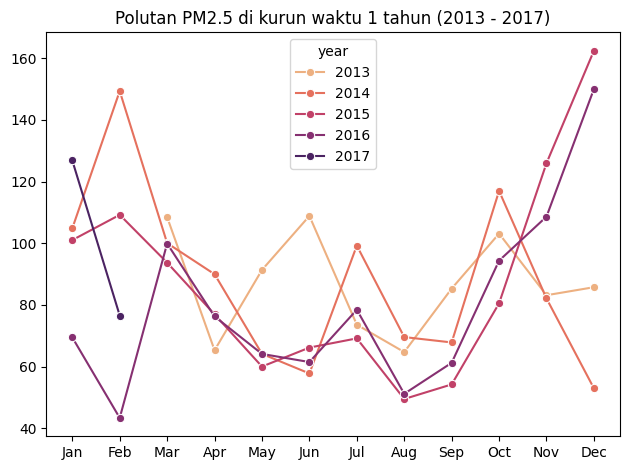

In [ ]:
data_df['month'] = pd.Categorical(data_df['month'], categories=
    ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    ordered= True)

monthly_sum = data_df.groupby(by=['month', 'year']).agg({
    'PM2.5': 'mean'
}).reset_index()


sns.lineplot(
    data= monthly_sum,
    x= 'month',
    y= 'PM2.5',
    hue= 'year',
    palette= 'flare',
    marker= 'o')

plt.title('Polutan PM2.5 di kurun waktu 1 tahun (2013 - 2017)')
plt.xlabel(None)
plt.ylabel(None)
plt.tight_layout()
plt.show()

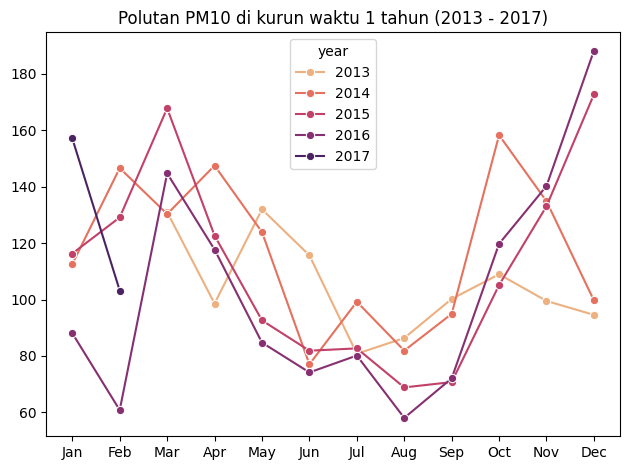

In [ ]:
data_df['month'] = pd.Categorical(data_df['month'], categories=
    ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    ordered= True)

monthly_sum = data_df.groupby(by=['month', 'year']).agg({
    'PM10': 'mean'
}).reset_index()


sns.lineplot(
    data= monthly_sum,
    x= 'month',
    y= 'PM10',
    hue= 'year',
    palette= 'flare',
    marker= 'o')

plt.title('Polutan PM10 di kurun waktu 1 tahun (2013 - 2017)')
plt.xlabel(None)
plt.ylabel(None)
plt.tight_layout()
plt.show()

Nilai PM(Particulate Matter) yang dihasilkan pada kurun waktu 2013-2017 menunjukkan bahwa pada bulan Desember sering terjadi peak dan baru menurun pada bulan februari.

pola yang dibuat dalam kurun waktu satu tahun yaitu berbentuk U, di awal tahun nilai polutan ini cukup tinggi dan menurun pada tengah tahun. lalu pada akhir tahun polutan meningkat dan

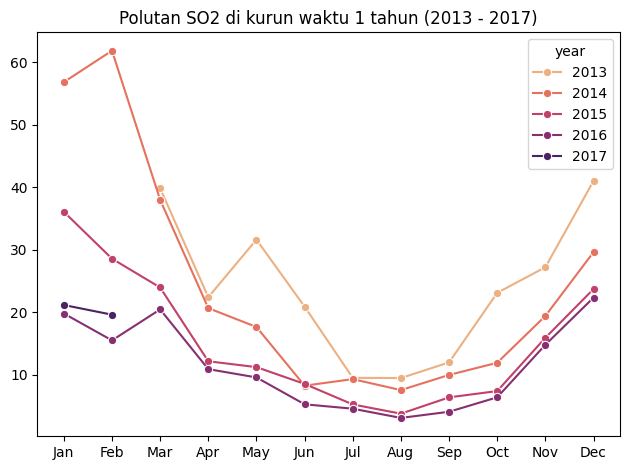

In [ ]:
data_df['month'] = pd.Categorical(data_df['month'], categories=
    ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    ordered= True)

monthly_sum = data_df.groupby(by=['month', 'year']).agg({
    'SO2': 'mean'
}).reset_index()


sns.lineplot(
    data= monthly_sum,
    x= 'month',
    y= 'SO2',
    hue= 'year',
    palette= 'flare',
    marker= 'o')

plt.title('Polutan SO2 di kurun waktu 1 tahun (2013 - 2017)')
plt.xlabel(None)
plt.ylabel(None)
plt.tight_layout()
plt.show()

Nilai SO2 (Sulfure Dioxide) yang dihasilkan pada kurun waktu 2013-2017 menunjukkan bahwa setiap bulan pada bulan September mengalami peningkatan dan akan menurun drastis pada bulan april.

Di tahun 2014 tepatnya bulan februaru menjadi peak/puncak nilai SO2 namun kebanyakan tiap tahunnya memiliki peak pada bulan desember. nilai SO2 sendiri mengalami penurunan dari tahun 2013 - 2017.

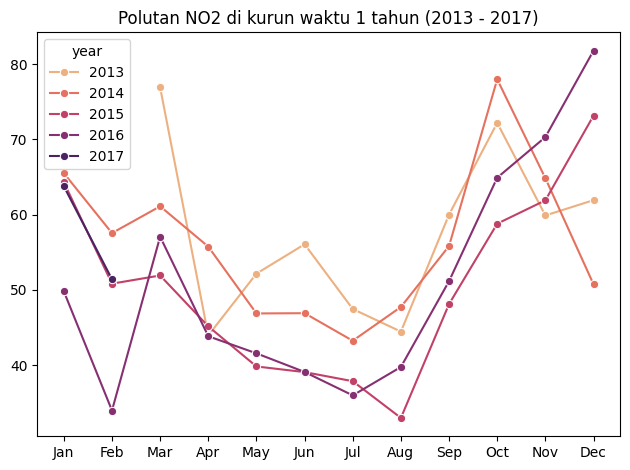

In [ ]:
data_df['month'] = pd.Categorical(data_df['month'], categories=
    ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    ordered= True)

monthly_sum = data_df.groupby(by=['month', 'year']).agg({
    'NO2': 'mean'
}).reset_index()


sns.lineplot(
    data= monthly_sum,
    x= 'month',
    y= 'NO2',
    hue= 'year',
    palette= 'flare',
    marker= 'o')

plt.title('Polutan NO2 di kurun waktu 1 tahun (2013 - 2017)')
plt.xlabel(None)
plt.ylabel(None)
plt.tight_layout()
plt.show()

Nilai NO2(Nitrogen Dioxide) yang dihasilkan pada kurun waktu 2013-2017 menunjukkan bahwa peningkatan terjadi pada bulan agustus/september dan mengalami penurunan dari bulan Januari-april(yang mana beberapa mengalami penurunan signifikan dan beberapa mengalami penurunan yang tidak terlalu besar)

pada tahun 2015-2016 peak data terjadi pada bulan desember, sedangkan pada tahun 2013-2014 peak terjadi pada bulan oktober.

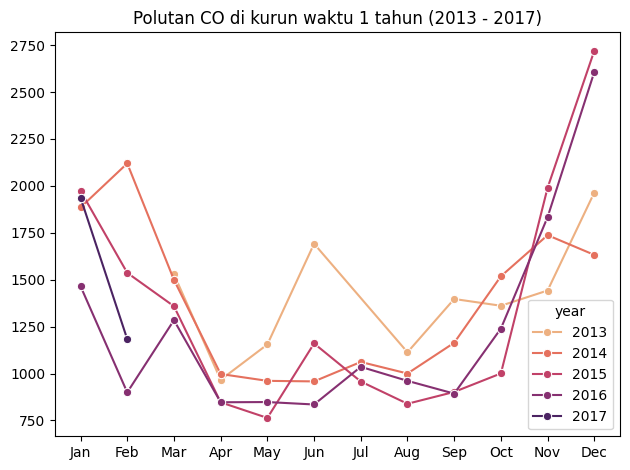

In [ ]:
data_df['month'] = pd.Categorical(data_df['month'], categories=
    ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    ordered= True)

monthly_sum = data_df.groupby(by=['month', 'year']).agg({
    'CO': 'mean'
}).reset_index()


sns.lineplot(
    data= monthly_sum,
    x= 'month',
    y= 'CO',
    hue= 'year',
    palette= 'flare',
    marker= 'o')

plt.title('Polutan CO di kurun waktu 1 tahun (2013 - 2017)')
plt.xlabel(None)
plt.ylabel(None)
plt.tight_layout()
plt.show()

nilai CO(Carbon Monoxide) yang dihasilkan pada kurun waktu 2013-2017 menunjukkan bahwa terjadi kenaikan nilai CO pada bulan september/oktober dan mengalami penurunan mulai dari bulan januari.

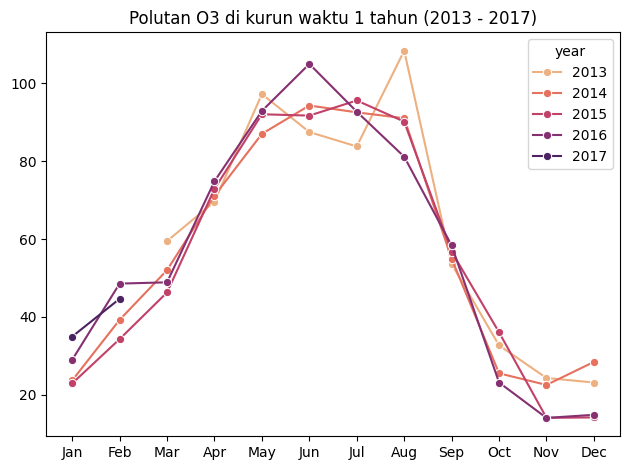

In [ ]:
data_df['month'] = pd.Categorical(data_df['month'], categories=
    ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    ordered= True)

monthly_sum = data_df.groupby(by=['month', 'year']).agg({
    'O3': 'mean'
}).reset_index()


sns.lineplot(
    data= monthly_sum,
    x= 'month',
    y= 'O3',
    hue= 'year',
    palette= 'flare',
    marker= 'o')

plt.title('Polutan O3 di kurun waktu 1 tahun (2013 - 2017)')
plt.xlabel(None)
plt.ylabel(None)
plt.tight_layout()
plt.show()

Nilai O3(Ozone) mengalami Kenaikan pada bulan februari dan penurunan pada bulan Agustus/September. berbeda seperti polutan lainnya, O3 mmemiliki trench / nilai terbawah pada bulan desember.

**Kesimpulan**



### Pertanyaan 2: Bagaimana polutan bereaksi bergantung pada curah hujan?

In [ ]:
# Import file csv lagi untuk menunjukkan data penuh dengan data yang bersih

RAIN_df = pd.read_csv("/content/PRSA_Data_Dongsi_20130301-20170228.csv")

Text(0.5, 1.0, 'RAIN X PM10')

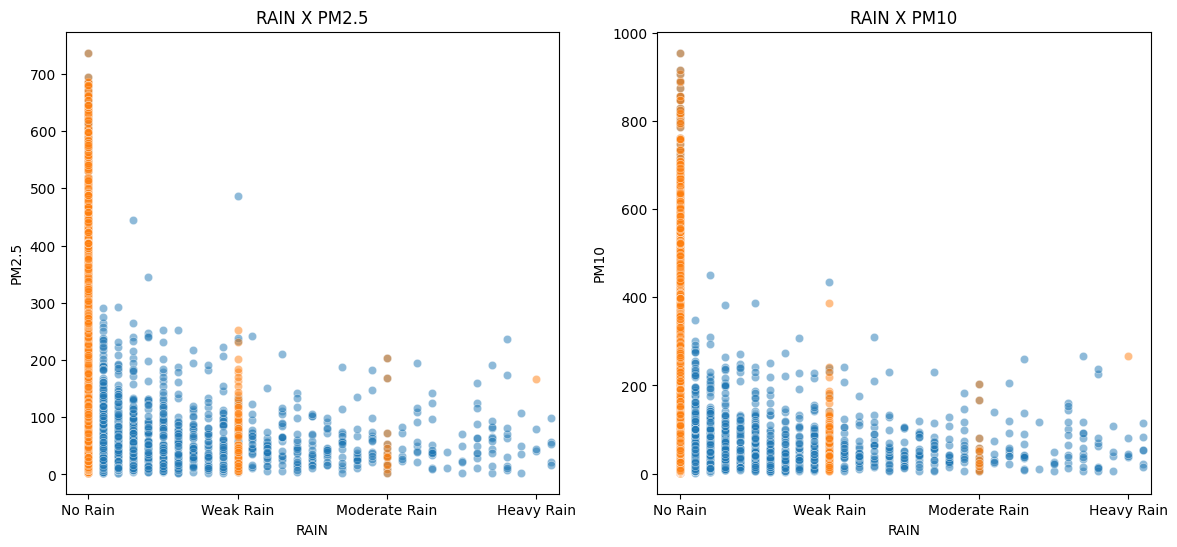

In [ ]:
plt.figure(figsize=(14, 6))

plt.subplot (1, 2, 1)
sns.scatterplot(
    x= 'RAIN',
    y= 'PM2.5',
    data= RAIN_df,
    alpha= 0.5
)
plt.title('RAIN X PM2.5')

plt.subplot (1, 2, 2)
sns.scatterplot(
    x= 'RAIN',
    y= 'PM10',
    data= RAIN_df,
    alpha= 0.5
)
plt.title('RAIN X PM10')

plt.subplot (1, 2, 1)
sns.scatterplot(
    x= 'RAIN',
    y= 'PM2.5',
    data= data_df,
    alpha= 0.5
)
plt.title('RAIN X PM2.5')

plt.subplot (1, 2, 2)
sns.scatterplot(
    x= 'RAIN',
    y= 'PM10',
    data= data_df,
    alpha= 0.5
)
plt.title('RAIN X PM10')

dari scatterplot data PM, dapat dilihat semakin deras curah hujannya semakin sedikit polutan PM muncul.

Text(0.5, 1.0, 'RAIN X NO2')

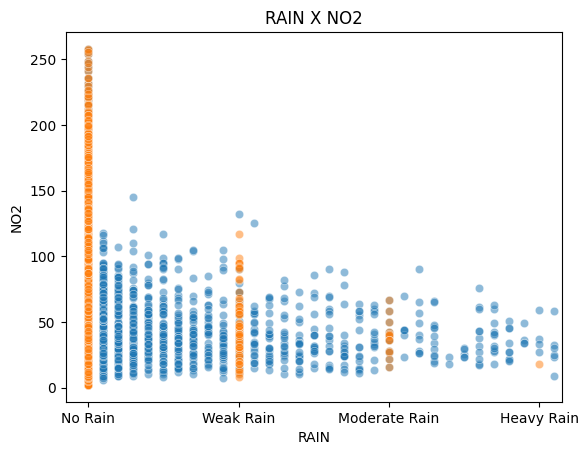

In [ ]:
sns.scatterplot(
    x= 'RAIN',
    y= 'NO2',
    data= RAIN_df,
    alpha= 0.5
)
plt.title('RAIN X NO2')

sns.scatterplot(
    x= 'RAIN',
    y= 'NO2',
    data= data_df,
    alpha= 0.5
)
plt.title('RAIN X NO2')

dari scatterplot data NO2, dapat dilihat semakin deras curah hujannya semakin sedikit intensitas NO2 yang keluar.

Text(0.5, 1.0, 'RAIN X SO2')

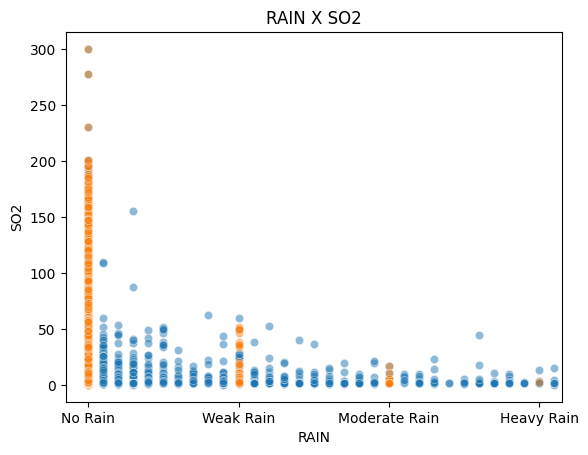

In [ ]:
sns.scatterplot(
    x= 'RAIN',
    y= 'SO2',
    data= RAIN_df,
    alpha= 0.5
)
plt.title('RAIN X SO2')

sns.scatterplot(
    x= 'RAIN',
    y= 'SO2',
    data= data_df,
    alpha= 0.5
)
plt.title('RAIN X SO2')

dari scatterplot data SO2, dapat dilihat semakin deras curah hujannya semakin sedikit intensitas SO2 yang keluar.

Text(0.5, 1.0, 'RAIN X CO')

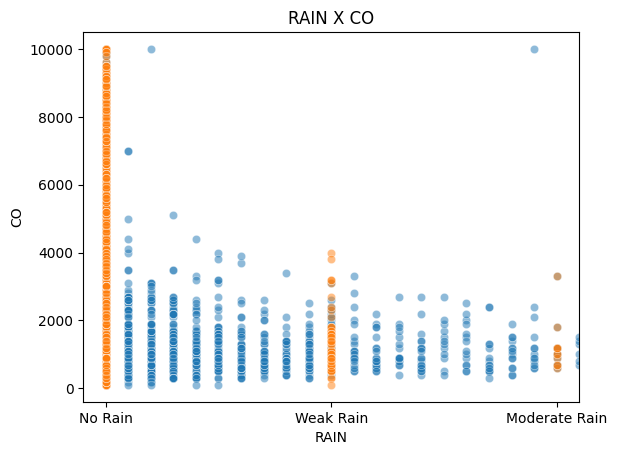

In [ ]:
sns.scatterplot(
    x= 'RAIN',
    y= 'CO',
    data= RAIN_df,
    alpha= 0.5
)
plt.title('RAIN X CO')

sns.scatterplot(
    x= 'RAIN',
    y= 'CO',
    data= data_df,
    alpha= 0.5
)
plt.title('RAIN X CO')

sama seperti polutan yang lain. curah hujan mempengaruhi intensitas polutan CO

Text(0.5, 1.0, 'RAIN X O3')

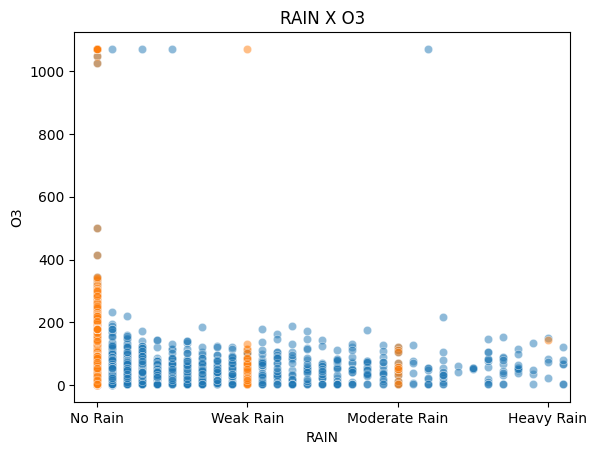

In [ ]:
sns.scatterplot(
    x= 'RAIN',
    y= 'O3',
    data= RAIN_df,
    alpha= 0.5
)
plt.title('RAIN X O3')

sns.scatterplot(
    x= 'RAIN',
    y= 'O3',
    data= data_df,
    alpha= 0.5
)
plt.title('RAIN X O3')

pada kondisi O3, semakin deras curah hujan nilainya tidak terlalu berubah atau terjadi penurunan yang tidak terlalu signifikan. Namun, Jika dilihat pada peak data, jumlah nya semakin menurun semakin derasnya curah hujan.

### Pertanyaan 3: Bagaimana kondisi polutan yang dihasilkan sesuai dengan suhu?

Text(0.5, 1.0, 'TEMP x PM2.5')

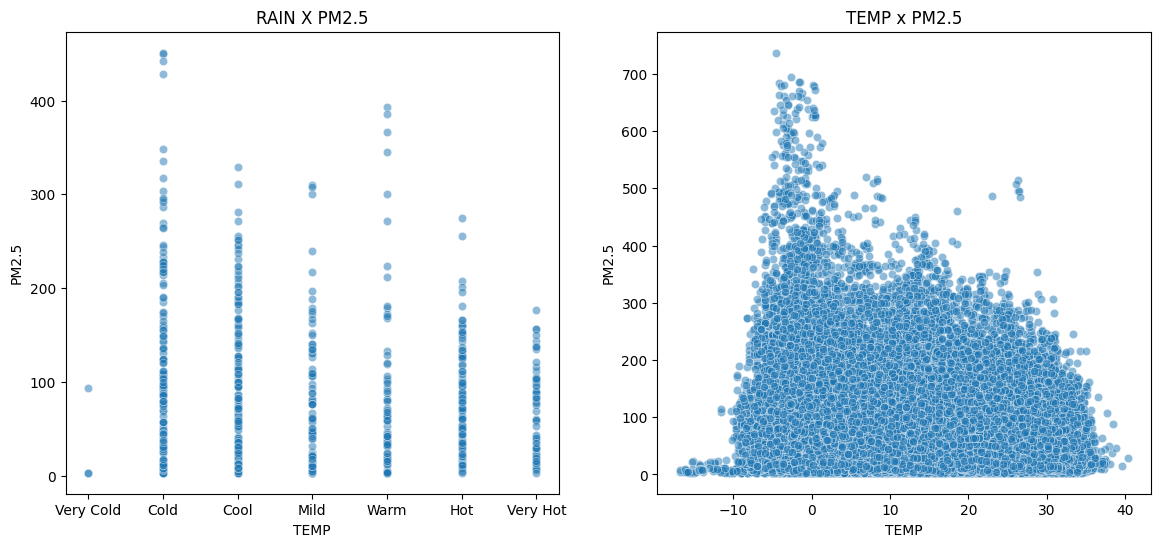

In [ ]:
data_df['TEMP'] = pd.Categorical(data_df['TEMP'], categories=
    ['Very Cold', 'Cold', 'Cool', 'Mild', 'Warm', 'Hot', 'Very Hot'],
    ordered= True)

plt.figure(figsize=(14, 6))

plt.subplot(1,2,1)
sns.scatterplot(
    x= 'TEMP',
    y= 'PM2.5',
    data= data_df,
    alpha= 0.5,
)
plt.title('RAIN X PM2.5')

plt.subplot(1,2,2)
sns.scatterplot(
    x= 'TEMP',
    y= 'PM2.5',
    data= RAIN_df,
    alpha= 0.5,
)
plt.title('TEMP x PM2.5')

Text(0.5, 1.0, 'TEMP x PM10')

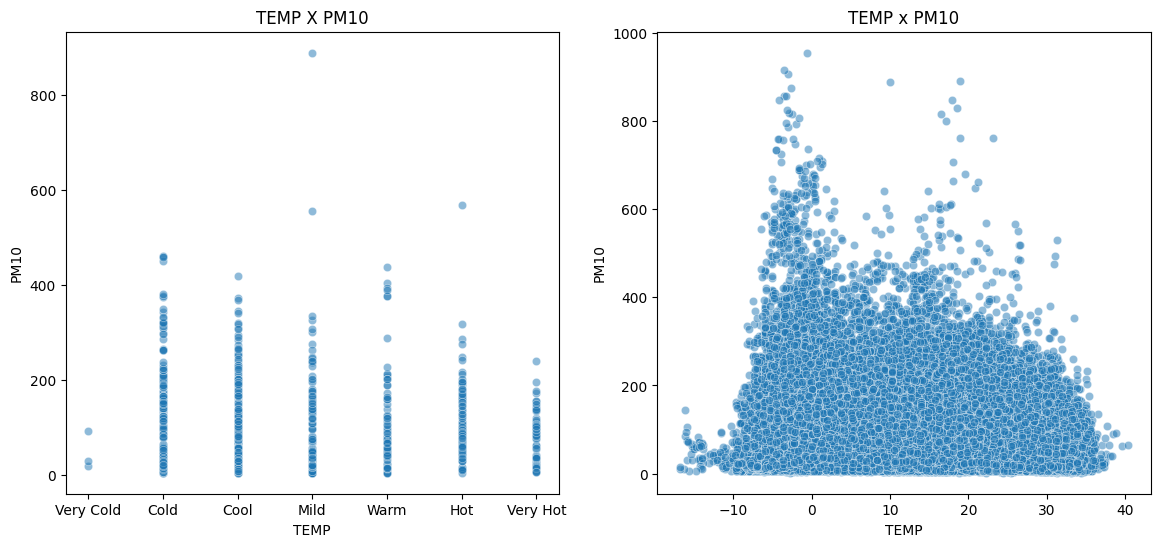

In [ ]:
data_df['TEMP'] = pd.Categorical(data_df['TEMP'], categories=
    ['Very Cold', 'Cold', 'Cool', 'Mild', 'Warm', 'Hot', 'Very Hot'],
    ordered= True)

plt.figure(figsize=(14, 6))

plt.subplot(1,2,1)
sns.scatterplot(
    x= 'TEMP',
    y= 'PM10',
    data= data_df,
    alpha= 0.5,
)
plt.title('TEMP X PM10')

plt.subplot(1,2,2)
sns.scatterplot(
    x= 'TEMP',
    y= 'PM10',
    data= RAIN_df,
    alpha= 0.5,
)
plt.title('TEMP x PM10')

rentan suhu mulai dari Very cold(-10) sampai Very hot(32). melalui data yang divisualisasikan polutan PM bisa terproduksi cukup tinggi di suhu Cold-Mild.

Text(0.5, 1.0, 'TEMP x SO2')

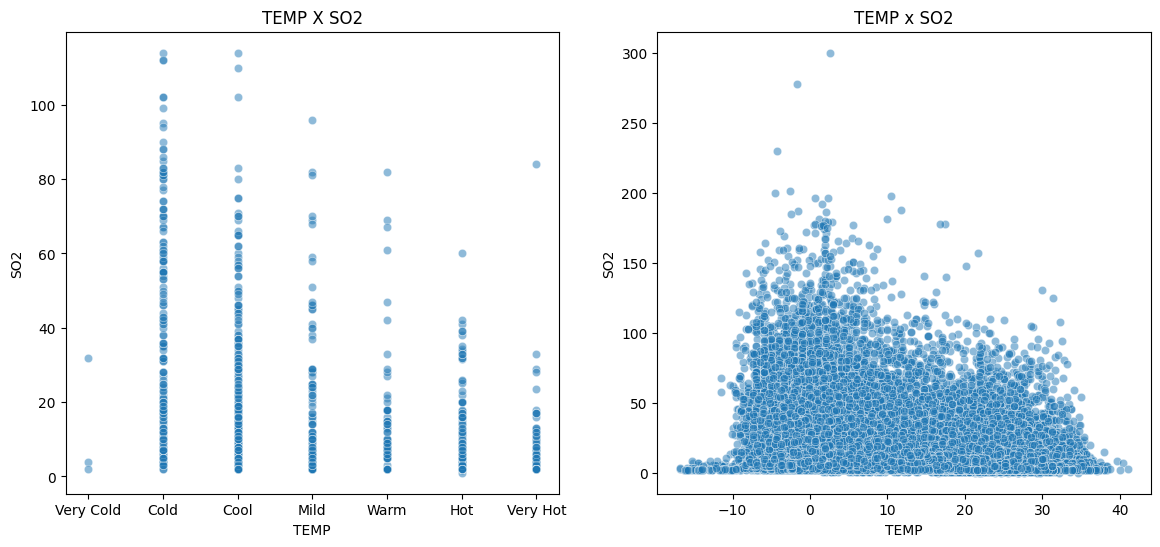

In [ ]:
data_df['TEMP'] = pd.Categorical(data_df['TEMP'], categories=
    ['Very Cold', 'Cold', 'Cool', 'Mild', 'Warm', 'Hot', 'Very Hot'],
    ordered= True)

plt.figure(figsize=(14, 6))

plt.subplot(1,2,1)
sns.scatterplot(
    x= 'TEMP',
    y= 'SO2',
    data= data_df,
    alpha= 0.5,
)
plt.title('TEMP X SO2')

plt.subplot(1,2,2)
sns.scatterplot(
    x= 'TEMP',
    y= 'SO2',
    data= RAIN_df,
    alpha= 0.5,
)
plt.title('TEMP x SO2')

rentan suhu mulai dari Very cold(-10) sampai Very hot(32). melalui data yang divisualisasikan polutan SO2 bisa terproduksi cukup tinggi di suhu Cold-Cool.

Text(0.5, 1.0, 'TEMP x NO2')

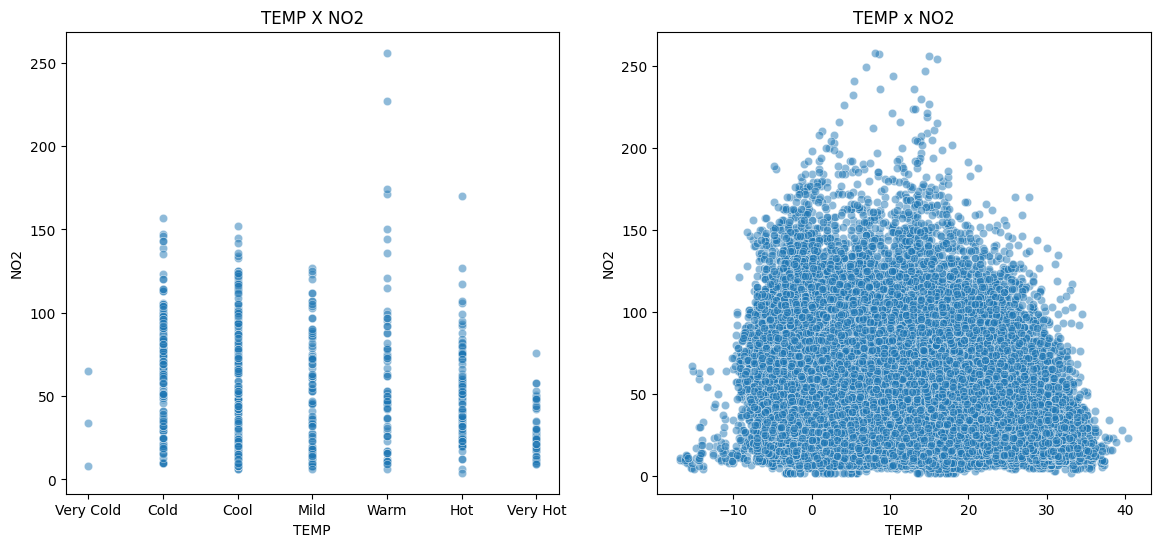

In [ ]:
data_df['TEMP'] = pd.Categorical(data_df['TEMP'], categories=
    ['Very Cold', 'Cold', 'Cool', 'Mild', 'Warm', 'Hot', 'Very Hot'],
    ordered= True)

plt.figure(figsize=(14, 6))

plt.subplot(1,2,1)
sns.scatterplot(
    x= 'TEMP',
    y= 'NO2',
    data= data_df,
    alpha= 0.5,
)
plt.title('TEMP X NO2')

plt.subplot(1,2,2)
sns.scatterplot(
    x= 'TEMP',
    y= 'NO2',
    data= RAIN_df,
    alpha= 0.5,
)
plt.title('TEMP x NO2')

rentan suhu mulai dari Very cold(-10) sampai Very hot(32). melalui data yang divisualisasikan polutan NO2 bisa terproduksi cukup tinggi di suhu Cool-Warm.

Text(0.5, 1.0, 'TEMP x CO')

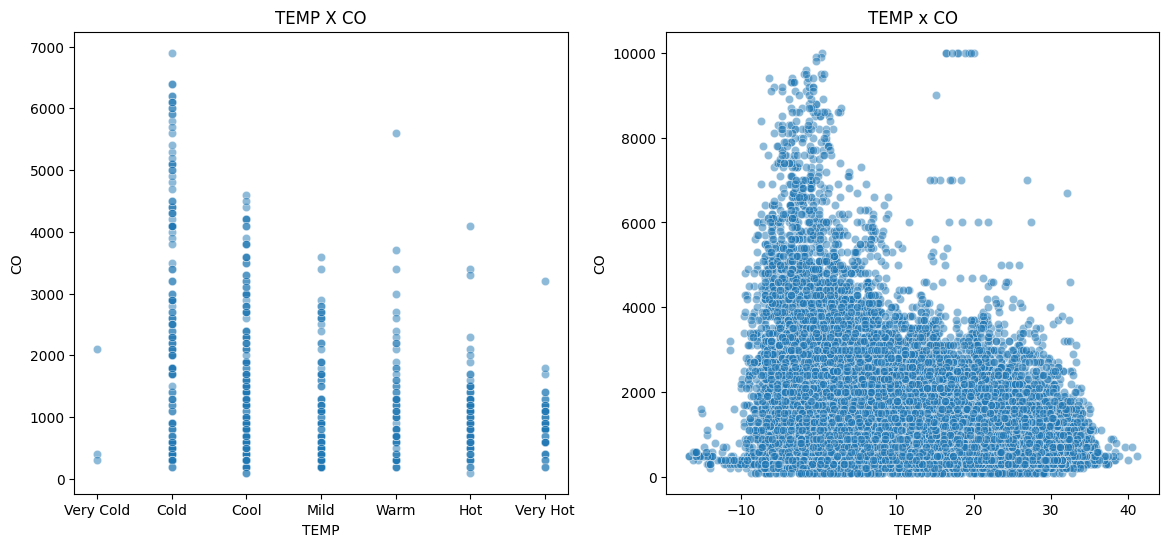

In [ ]:
data_df['TEMP'] = pd.Categorical(data_df['TEMP'], categories=
    ['Very Cold', 'Cold', 'Cool', 'Mild', 'Warm', 'Hot', 'Very Hot'],
    ordered= True)

plt.figure(figsize=(14, 6))

plt.subplot(1,2,1)
sns.scatterplot(
    x= 'TEMP',
    y= 'CO',
    data= data_df,
    alpha= 0.5,
)
plt.title('TEMP X CO')

plt.subplot(1,2,2)
sns.scatterplot(
    x= 'TEMP',
    y= 'CO',
    data= RAIN_df,
    alpha= 0.5,
)
plt.title('TEMP x CO')

rentan suhu mulai dari Very cold(-10) sampai Very hot(32). melalui data yang divisualisasikan polutan NO2 bisa terproduksi cukup tinggi di suhu Cold-Cool.

Text(0.5, 1.0, 'TEMP x O3')

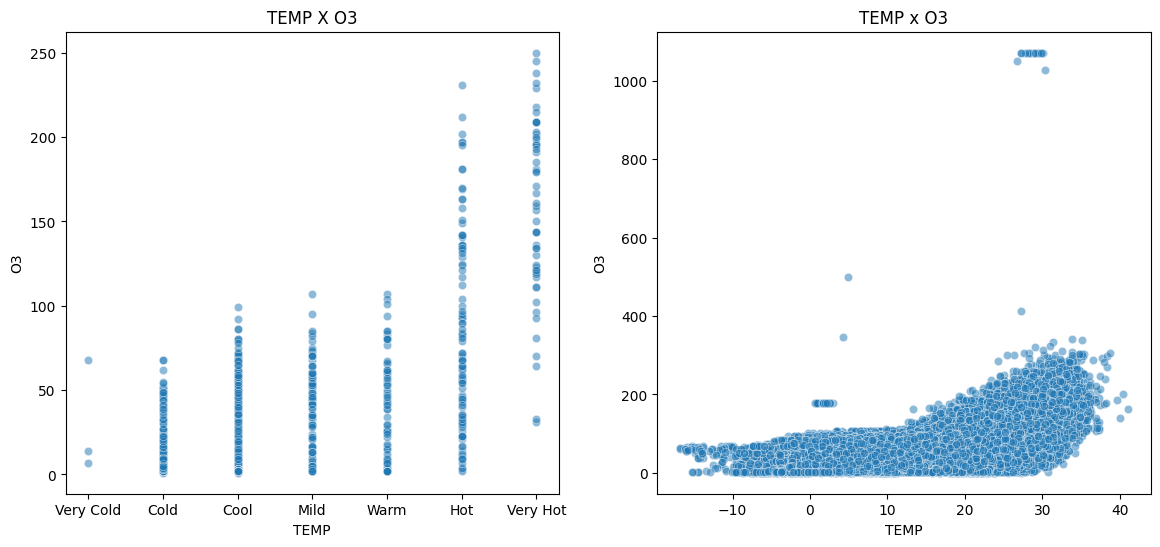

In [ ]:
data_df['TEMP'] = pd.Categorical(data_df['TEMP'], categories=
    ['Very Cold', 'Cold', 'Cool', 'Mild', 'Warm', 'Hot', 'Very Hot'],
    ordered= True)

plt.figure(figsize=(14, 6))

plt.subplot(1,2,1)
sns.scatterplot(
    x= 'TEMP',
    y= 'O3',
    data= data_df,
    alpha= 0.5,
)
plt.title('TEMP X O3')

plt.subplot(1,2,2)
sns.scatterplot(
    x= 'TEMP',
    y= 'O3',
    data= RAIN_df,
    alpha= 0.5,
)
plt.title('TEMP x O3')

rentan suhu mulai dari Very cold(-10) sampai Very hot(32). melalui data yang divisualisasikan polutan O3 mengalami peningkatan disaat suhu Hot-Very Hot.

## Conclusion

- Conclution pertanyaan 1 : Fokus polutan pada perhitungan satu tahun adalah semua polutan selain O3. khususnya pada bulan desember dimana hampir semua polutan terjadi pemuncakan pada bulan tersebut. Sedangkan fokus untuk polutan O3 adalah pada pertangahan tahun (Mei- Agustus) dimana nilai polutan tersebut sedang tinggi.
  Untuk pola yang dihasilkan tiap polutan yaitu untuk PM, NO2, SO2, CO memiliki pola berbentuk "U" yang mana pada awal tahun(Januari-April) terjadi penuruan dan nilai akan mencapai bottom/terbawah pada pertengahan tahun(Mei-Agustus) dan akan mengalami penaikan di akhir tahun(September-Desember). Sedangkan polutan O3 memiliki pola "Inverted U" yang mana pada awal tahun(Januari-april) mengalami penaikan, pertengahan tahun(Mei-Agustus) mencapai peak/puncak, dan akhir tahun(September-Desember) mengalami penurunan.
  Perbandingan nilai polutan pertahun yaitu beberapa mengalami penurunan(O3 dan SO2) dan beberapa mengalami penaikan (PM2.5, PM10, NO2, CO).


- Conclution pertanyaan 2 : Kebergantungan curah hujan dengan polutan cukup terlihat atau memang bergantung. pada data, semakin deras curah hujannya semakin menurun juga intensitas polutannya. Pada polutan O3, pada saat curah hujan terang atau mendung nilai O3 bisa mencapai nilai intensitas cukup tinggi. sedangkan saat mulai turun hujan(Weak-Heavy) nilai intensitas yang dicapai stabil.

- Conclution pertanyaan 3 : Korelasi kedua value cukup bergantung dengan naik turunnya nilai antar keduanya. disaat kita menggunakan rentan suhu mulai dari -10°C sampai dengan 32°C kita dapat menangkap korelasi tiap data. Seperti; untuk polutan PM akan berproduksi lebih tinggi disaat suhu diantara -6°C sampai 10°C, polutan SO2 diantara -6°C sampai 4°C, polutan NO2 diantara 4°C sampai 15°C, polutan CO diantara -6°C sampai 4°C, dan O3 akan mengalami kenaikan value dari 26°C sampai 32°C. Jadi menurut dingin panasnya suhu, polutan juga akan menentukan tinggi rendahnya intensitas polutan tersebut.